# Macroeconometrics Take-Home Exam

**By Alexander Gritsay**

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import matplotlib.ticker as mticker
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from scipy.signal import periodogram
import statsmodels.api as sm
from scipy import signal
from spectrum import pburg
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic


import statsmodels.tsa as smt

plt.style.use('classic')
plt.rcParams.update({'figure.facecolor': 'white'})

## Question 1

1. Briefly explain these two approaches in a formal way. When and why do they give
the same results? When and why do they differ?

The Local Projection (LP) approach is set up with the following linear projection specification:

$y_{t+h} = \mu_{h} + \beta_{h}x_{t} + \gamma_{h}' r_{t} + \sum^{\infty}_{l=1} \delta_{h,l}'\omega_{t-l} + \xi_{h,t}$

This method works by regressing the future values of the dependent variable of interest on the appropriate present and lagged values of the regressors and controls. Subsequently, the impulse response function of $y_{t}$ with respect to $x_{t}$ is given by $\{\beta_{h}\}_{h\geq0}$. $\beta_{h}$ coefficients can be expressed as:

$\beta_{h} = E(y_{t+h}|x_{t} = 1, r_{t},\{\omega_{\tau}\}_{\tau<t}) - E(y_{t+h}|x_{t} = 0, r_{t}, \{\omega_{\tau}\}_{\tau<t})$

The second method discussed by the authors is the Vector Autoregression (VAR).

It can be expressed in the following specification form with infinite number of lags ($VAR(\infty)$:

$\omega_{t} = c + \sum^{\infty}_{l=1} A_{l}\omega_{t-l} + u_{t}$

where $\omega_{t}$, as in the case of LP is $\omega_{t} = (r'_{t}, x_{t}, y_{t}, q'_{t})'$.
Here, unlike in Linear projection, the regression occurs such that each dependent variable is regressed on the lags of all other variables (including of itself) simultaneously. The VAR approach then utilises Cholesky  decomposition to arrive at the respective impulse response functions (IRFs).

The central finding of the paper is that despite the two methods being conceptually different, the do end up estimating identical population impulse response functions (under certain conditions).

The condition that is deemed necessary for the two methods to lead to the same results (w.r.t the IRFs) is sufficiently large number of lags; and with infinite lags, the two methods are expect to be in complete agreement. As one would expect, longer-term approximation would require more lags to make more accurate inferences (and have better predictive power) about the population. Hence, the authors observe  that the two methods tend to agree considerably, up to limited periods (around 4 quarters) with finite number of lags. Yet this relationship can break down in longer-run predictions.

2. Both these approaches require an identification of structural shocks. This paper
mentions several of these identification schemes. What are they? Briefly provide
rationale for these identification schemes.

The article considers three indenitification schemes - Cholesky decomposition, sign restrictions, and time restrictions (i.e. short-/long-run effects).

Cholseky decomposition utilises lower triangular matrix of IR, providing a recursive identification of shocks. This is probably the more popular and conventional scheme due to its relevance to the theory (i.e. structural approach) and convenience.

Another scheme that is even more dependent on the economic theory is the sign  restriction scheme. This a more lenient approach that is less demanding in terms of identification precision. The purpose of this scheme is to simply regulate the direction of the potential effect. Therefore, it is probably less useful, when researchers would like to eliminate an effect entirely.

Finally, time restrictions separates the potential effects into short- and long-run variables. Therefore, it is also rooted in economic theory, which as expected,  determines its utility. The selection of restrictions depends on the specific macroeconomic theory that is selected. It is a stronger scheme for elimintating certain effects than the sign restriction scheme is.

3. This paper discusses only the point estimation of IRFs and leaves aside their
confidence interval estimation. What are the main approaches to estimate the
confidence intervals of IRFs in the SVAR framework? How to estimate the confidence
intervals of IRFs using LP approach

One way that to estimate confidence intervals of IRFs in SVAR framework is through the bootstrap method. This is an especially popular method in the case of limited sample sizes (or skewed samples).

Sometimes, delta method might be appropriate, but this is subject to relatively strong assumptions, such as normally  distributed errors. It is also desirable to have asymptotic properties of the  sample, which is difficult with smaller sample sizes.

Under LP approach, the confidence intervals are calculated using heteroscedasticity autocorrelation consistent robust errors in IRFs estimation.

## Question 2

1. Compute the matrix of parameters of the reduced-form VAR(1) model, $\Pi = A_{0}A$,
and covariance matrix of the reduced-form errors $\Sigma = A_{0}A_{0}′$. Write down the conditions for a stability of VAR in terms of restrictions on $\alpha$, $\rho$ and $\phi$.

$ \Pi = A_{0}A =
\begin{pmatrix}
\rho & 0 \\
\alpha\rho & \phi
\end{pmatrix}$

$ \Sigma = A_{0}A_{0}' = 
\begin{pmatrix}
1 & -\alpha \\
\alpha & -\alpha^{2} +1
\end{pmatrix}$

The appropriate restrictions for stability are:

$\rho < |1|$

$\phi <|1|$

**Part 2**

$(I - \Pi L) B(L) = I$

$B(L) =
\begin{pmatrix}
\frac{1}{1-\rho L} & 0 \\
\frac{-\alpha \rho}{(1-\rho L)(1-\phi L)} & \frac{1}{1-\phi L}
\end{pmatrix}$

$C(L) = B(L)A_{0} = 
\begin{pmatrix}
\frac{1}{1-\rho L} & 0 \\
\frac{-\alpha \rho}{(1-\rho L)(1-\phi L)} & \frac{1}{1-\phi L}
\end{pmatrix}$ $\begin{pmatrix}
1 & 0 \\
\alpha & 1
\end{pmatrix}$ $= \begin{pmatrix}
\frac{1}{1-\rho L} & 0 \\
\frac{\alpha}{(1-\rho L)(1-\phi L)} & \frac{1}{1-\phi L}
\end{pmatrix}$

Another way of writing $B(L)$ (recursively) is:

$\sum^{\infty}_{i=0} \begin{pmatrix}
\rho^{i} & 0 \\
\rho \alpha \sum^{i-1}_{h=0} \rho^{h} \phi^{i-1-h} & \phi^{i}
\end{pmatrix}$

Then $C(L)$ is:

$\sum^{\infty}_{i=0} \begin{pmatrix}
\rho^{i} & 0 \\
\rho \alpha \sum^{i-1}_{h=0} \rho^{h} \phi^{i-1-h} & \phi^{i}
\end{pmatrix} \begin{pmatrix}
1 & 0 \\
\alpha & 1
\end{pmatrix} \cdot L^{i} = \begin{pmatrix}
\rho^{i} & 0 \\
\alpha \sum^{i}_{h=0} \rho^{h} \phi^{i-1-h} & \phi^{i}
\end{pmatrix} \cdot L^{i}$


Using the above two expressions, we obtain the following impulse responses:

$\begin{pmatrix}
\frac{\partial{x}_{t+h}}{\partial{\epsilon}_{1,t}} & \frac{\partial{x}_{t+h}}{\partial{\epsilon}_{2,t}}  \\
\frac{\partial{y}_{t+h}}{\partial{\epsilon}_{1,t}} & \frac{\partial{y}_{t+h}}{\partial{\epsilon}_{2,t}}
\end{pmatrix} = \begin{pmatrix}
\rho^{h} & 0 \\
\alpha \sum^{h}_{k=0} \rho^{k} \phi^{h-k} & \phi^{h}
\end{pmatrix}$

**Part 3**

The given data generating process are:

(P.S. I do apologise for not transferring all the workings out from my notes, I was running very short on time)

$x_{t} = \rho x_{t-1} + \epsilon_{1,t}$

$y_{t} = \phi y_{t-1} + \alpha x_{t} + \epsilon_{2,t}$

These can be rewritten recursively as:

$x_{t+h} = \rho^{h+1} x_{t-1} + \sum^{h}_{j=0} \rho^{j} \epsilon_{1, t+h-j}$

and

$y_{t+h} = \phi^{h+1} y_{t-1} + \alpha(x_{t-1} + \epsilon_{1,t}) \sum^{h}_{j=0} \phi^{j} \rho^{h-j} + \sum^{h}_{j=0} \phi^{j} \epsilon_{2, t+h-j}$

From here on we can employ the two expressions from the paper (page 960):

$\beta_{h} = \frac{cov(y_{t+h}, \tilde{x}_{t})}{E(\tilde{x}_{t}^{2})}$ 

and

$\tilde{x}_{t} = x - E[x_{t}|x_{t-1},y_{t-1}] = x_{t} - \rho x_{t-1} = \epsilon_{1,t}$

{using the fact that $E(\epsilon_{1,t}^{2})=1$}

$\beta_{1,h} = \frac{cov(x_{t+h}, \epsilon_{1,t})}={E(\epsilon_{1,t}^{2})} = E(x_{t+h} \epsilon_{1,t}) = E[(x_{t+h} = \rho^{h+1} x_{t-1} + \sum^{h}_{j=0} \rho^{j} \epsilon_{1, t+h-j}) \epsilon_{1,t}]=E[\rho^{h} \epsilon_{1,t}^{2}] = \rho^{h}$

In the same fashion:

$\beta_{2,h} = E[\phi^{h+1} y_{t-1} + \alpha(x_{t-1} + \epsilon_{1,t}) \sum^{h}_{j=0} \phi^{j} \rho^{h-j} + \sum^{h}_{j=0} \phi^{j} \epsilon_{2, t+h-j}) \epsilon_{1,t}] = \alpha \sum^{h}_{j=0} \phi^{j}\rho^{h-j}$



**Part 4**

Continuing from part 3, I apply the same steps:

$\beta_{3, h} = \frac{cov(x_{t+h}, \epsilon_{2,t})}{E(\epsilon_{2,t}^{2})}$

It follows from $x_{t} = \rho x_{t-1} + \epsilon_{1,t}$ that $cov(x_{t+h}, \epsilon_{2,t})=0$, and hence $\beta_{3, h}=0$.

Finally, 

$\beta_{4,h} = \frac{cov(y_{t+h},\epsilon_{2,t})}{E(\epsilon_{2,t}^{2})}$

Applying the same  steps as above, I get:

$\beta_{4,h} = \frac{cov(y_{t+h},\epsilon_{2,t})}{E(\epsilon_{2,t}^{2})} = E[\phi^{h+1} y_{t-1} + \alpha(x_{t-1} + \epsilon_{1,t}) \sum^{h}_{j=0} \phi^{j} \rho^{h-j} + \sum^{h}_{j=0} \phi^{j} \epsilon_{2, t+h-j})\epsilon_{2,t}] = \phi^{h}$

## Question 3

In [13]:
df = pd.read_excel('USData.xls.xls', index_col=0)
df

,ff4_hf,gs1,us_cpi,us_ip,logsp500,ebpnew
date,,,,,,
1990-02-01,-0.020,8.11,485.20303,416.43433,580.08063,0.4263
1990-03-01,-0.020,8.35,485.67068,416.93298,582.44196,0.4593
1990-04-01,0.000,8.40,485.90369,416.81757,582.44385,0.0782
1990-05-01,0.000,8.32,486.05872,416.98044,585.91846,0.0960
1990-06-01,0.000,8.10,486.67648,417.31158,588.71777,0.2115
...,...,...,...,...,...,...
2016-08-01,0.000,0.57,548.22583,463.61444,768.59247,-0.1840
2016-09-01,-0.005,0.59,548.48218,463.46298,767.67938,-0.2368
2016-10-01,0.000,0.66,548.76727,463.64188,766.99719,-0.2012


Text(0, 0.5, 'Measure of MP surprises')

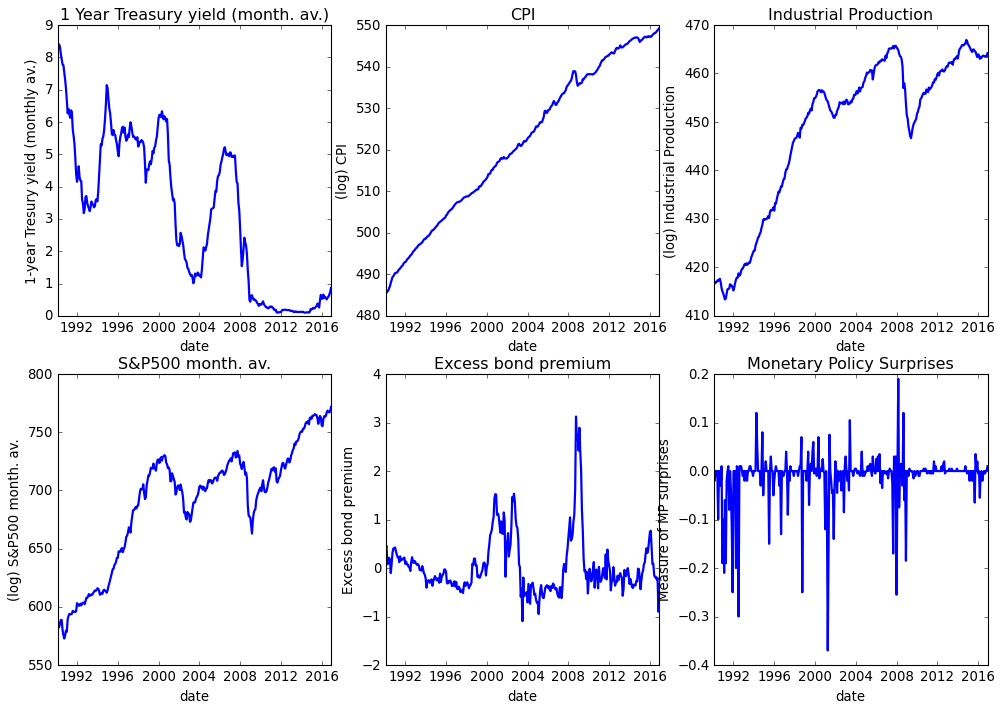

In [32]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10), sharex=False, sharey=False)

axs[0, 0].plot(df.gs1,'-',lw=2,alpha = 1)
axs[0, 0].set_title('1 Year Treasury yield (month. av.)')
axs[0, 0].set_xlabel('date')
axs[0, 0].set_ylabel('1-year Tresury yield (monthly av.)')

axs[0, 1].plot(df.us_cpi,'-',lw=2,alpha = 1)
axs[0, 1].set_title('CPI')
axs[0, 1].set_xlabel('date')
axs[0, 1].set_ylabel('(log) CPI')

axs[0, 2].plot(df.us_ip,'-',lw=2,alpha = 1)
axs[0, 2].set_title('Industrial Production')
axs[0, 2].set_xlabel('date')
axs[0, 2].set_ylabel('(log) Industrial Production')

axs[1, 0].plot(df.logsp500,'-',lw=2,alpha = 1)
axs[1, 0].set_title('S&P500 month. av.')
axs[1, 0].set_xlabel('date')
axs[1, 0].set_ylabel('(log) S&P500 month. av.')

axs[1, 1].plot(df.ebpnew,'-',lw=2,alpha = 1)
axs[1, 1].set_title('Excess bond premium')
axs[1, 1].set_xlabel('date')
axs[1, 1].set_ylabel('Excess bond premium')

axs[1, 2].plot(df.ff4_hf,'-',lw=2,alpha = 1)
axs[1, 2].set_title('Monetary Policy Surprises')
axs[1, 2].set_xlabel('date')
axs[1, 2].set_ylabel('Measure of MP surprises')


Next, I perform the **Dickey-Fuller** test for unit roots

In [39]:
#The first test is for 1-year Treasury Yield
DF_test_gs1 = adfuller(df.gs1)

In [40]:
print('DF Statistic:', DF_test_gs1[0]) 
print('p-value:', DF_test_gs1[1])
print('Critical Values:', DF_test_gs1[4])

DF Statistic: -1.8780672905546376
p-value: 0.3424482392697335
Critical Values: {'1%': -3.451621854687657, '5%': -2.870908950689806, '10%': -2.571761810613944}


The results suggest that we cannot reject the null hypothesis that there is a unit root in the variable for 1-year Treasury yield (monthly averages). We can therefore assume that the process is non-stationary.

In [42]:
#DF test for CPI
DF_test_CPI = adfuller(df.us_cpi)
print('DF Statistic:', DF_test_CPI[0])
print('p-value:', DF_test_CPI[1])
print('Critical Values:', DF_test_CPI[4])

DF Statistic: -2.5978668882555245
p-value: 0.09343894019977994
Critical Values: {'1%': -3.451621854687657, '5%': -2.870908950689806, '10%': -2.571761810613944}


It seems that we are only able to  reject the null hypothesis at 10% significance level.

In [43]:
#DF test for Iindustrial Production
DF_test_IP = adfuller(df.us_ip)
print('DF Statistic:', DF_test_IP[0])
print('p-value:', DF_test_IP[1])
print('Critical Values:', DF_test_IP[4])

DF Statistic: -1.7684490930723595
p-value: 0.3962344799615265
Critical Values: {'1%': -3.451281394993741, '5%': -2.8707595072926293, '10%': -2.571682118921643}


As with the 1-year Treasury bond yields, we cannot reject the null hypothesis for the Industrial Production variable, thus concluding that the process is not stationary.

In [44]:
#DF test for S&P500
DF_test_SP500 = adfuller(df.logsp500)
print('DF Statistic:', DF_test_SP500[0])
print('p-value:', DF_test_SP500[1])
print('Critical Values:', DF_test_SP500[4])

DF Statistic: -1.615398932788067
p-value: 0.4751422701675386
Critical Values: {'1%': -3.4512146067362317, '5%': -2.870730188960711, '10%': -2.5716664849383113}


We cannot reject the null hypothesis for the S&P500 variable, concluding that it is also not a stationary process.

In [45]:
#DF test for Excess bond premium
DF_test_EBP = adfuller(df.ebpnew)
print('DF Statistic:', DF_test_EBP[0])
print('p-value:', DF_test_EBP[1])
print('Critical Values:', DF_test_EBP[4])

DF Statistic: -4.2283182787022255
p-value: 0.0005898294076090168
Critical Values: {'1%': -3.451082300831733, '5%': -2.87067210822307, '10%': -2.5716355136268345}


The results of the test allow for the rejection of the null at 1% significance level. Hence, we can consider the excess bond premia to follow a stationary process.

In [46]:
#DF test for Monetary Policy Surprises
DF_test_MP = adfuller(df.ff4_hf)
print('DF Statistic:', DF_test_MP[0])
print('p-value:', DF_test_MP[1])
print('Critical Values:', DF_test_MP[4])

DF Statistic: -4.154938585569635
p-value: 0.0007846861844954801
Critical Values: {'1%': -3.451281394993741, '5%': -2.8707595072926293, '10%': -2.571682118921643}


As with the previous test, I reject the null hypothesis at 1% level, and conclude that the process for Monetary policy surprises is indeed stationary.

Let us now test the nonstationary variables for conintegration, by performing a Johansen test

In [116]:
coint_test_vars = df[['gs1', 'us_cpi', 'us_ip', 'logsp500']]
Joh_test = coint_johansen(coint_test_vars, det_order=0, k_ar_diff=2)
Joh_test_critval = Joh_test.cvt

In [117]:
print("Trace statistics are", Joh_test.trace_stat)
print("Critical values are", np.matrix(Joh_test_critval))
print(Joh_test.eig)


Trace statistics are [34.99163186 19.23356099  8.54495585  3.57309567]
Critical values are [[44.4929 47.8545 54.6815]
 [27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
[0.04805115 0.03285021 0.01541699 0.01110382]


In [118]:
def joh_output(res):
    output = pd.DataFrame([res.lr2,res.lr1],
                          index=['max_eig_stat',"trace_stat"])
    print(output.T,'\n')
    print("Critical values(90%, 95%, 99%) of max_eig_stat\n",res.cvm,'\n')
    print("Critical values(90%, 95%, 99%) of trace_stat\n",res.cvt,'\n')

In [119]:
joh_output(Joh_test)

   max_eig_stat  trace_stat
0     15.758071   34.991632
1     10.688605   19.233561
2      4.971860    8.544956
3      3.573096    3.573096 

Critical values(90%, 95%, 99%) of max_eig_stat
 [[25.1236 27.5858 32.7172]
 [18.8928 21.1314 25.865 ]
 [12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]] 

Critical values(90%, 95%, 99%) of trace_stat
 [[44.4929 47.8545 54.6815]
 [27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]] 



As can be seen above, the trace statistics that I have obtained are less than the critical values at every significance level. I therefore fail to reject the null hypothesis and conclude that cointegration is not present.

It follows that since cointegration is not the case, we may work with VAR model in first differences of non-stationary variables, and in levels of stationary ones.

### Question 3 (Part 2)

Now I perform reduced form VAR:

In [114]:
VAR_model = VAR(df)
for i in [0,1,2,3,4,5,6,7,8,9]:
    result = VAR_model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 0
AIC :  8.486054169749183
BIC :  8.5562272779205
FPE :  4846.704596978329
HQIC:  8.51406645808557 

Lag Order = 1
AIC :  -14.03857451355425
BIC :  -13.54624170326585
FPE :  8.000965675440585e-07
HQIC:  -13.842019574699968 

Lag Order = 2
AIC :  -14.537069976178557
BIC :  -13.620645030371264
FPE :  4.861230651774867e-07
HQIC:  -14.171164049478769 

Lag Order = 3
AIC :  -14.558512925626664
BIC :  -13.216048570875133
FPE :  4.7608288494527923e-07
HQIC:  -14.022441427802805 

Lag Order = 4
AIC :  -14.58983173001492
BIC :  -12.819365694222673
FPE :  4.619083873625301e-07
HQIC:  -13.882773765785986 

Lag Order = 5
AIC :  -14.531995845253098
BIC :  -12.331550696834503
FPE :  4.902899298014384e-07
HQIC:  -13.653124140400987 

Lag Order = 6
AIC :  -14.50140365764847
BIC :  -11.86898664250413
FPE :  5.068804232817683e-07
HQIC:  -13.44988449118598 

Lag Order = 7
AIC :  -14.585703331783844
BIC :  -11.519306208032503
FPE :  4.6766614341486757e-07
HQIC:  -13.36069646721079 

Lag Order 

C:\Users\alexg\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


With the lowest values of BIC and HQIC criteria at 2 lags, this is an optimal choice of lags for the  VAR model. That said, other criteria, such as AIC, does suggest 4 lags.

In [120]:
VAR_fitted = VAR_model.fit(2)
VAR_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 29, Apr, 2023
Time:                     19:30:26
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -13.6206
Nobs:                     321.000    HQIC:                  -14.1712
Log likelihood:          -321.676    FPE:                4.86123e-07
AIC:                     -14.5371    Det(Omega_mle):     3.83087e-07
--------------------------------------------------------------------
Results for equation ff4_hf
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              -0.363771         0.225174           -1.616           0.106
L1.ff4_hf          -0.049128         0.058702           -0.837           0.403
L1.gs1              0.055658         0.016477            3.378     

### Question 3 (Part 3)

Fitting a VAR(12) model

In [121]:
VAR12_fitted = VAR_model.fit(12)
VAR12_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 29, Apr, 2023
Time:                     19:38:05
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -9.07309
Nobs:                     311.000    HQIC:                  -12.2348
Log likelihood:           20.1406    FPE:                6.24351e-07
AIC:                     -14.3401    Det(Omega_mle):     1.76199e-07
--------------------------------------------------------------------
Results for equation ff4_hf
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const               -0.362191         0.329733           -1.098           0.272
L1.ff4_hf           -0.073713         0.069236           -1.065           0.287
L1.gs1               0.047971         0.021669            2.214

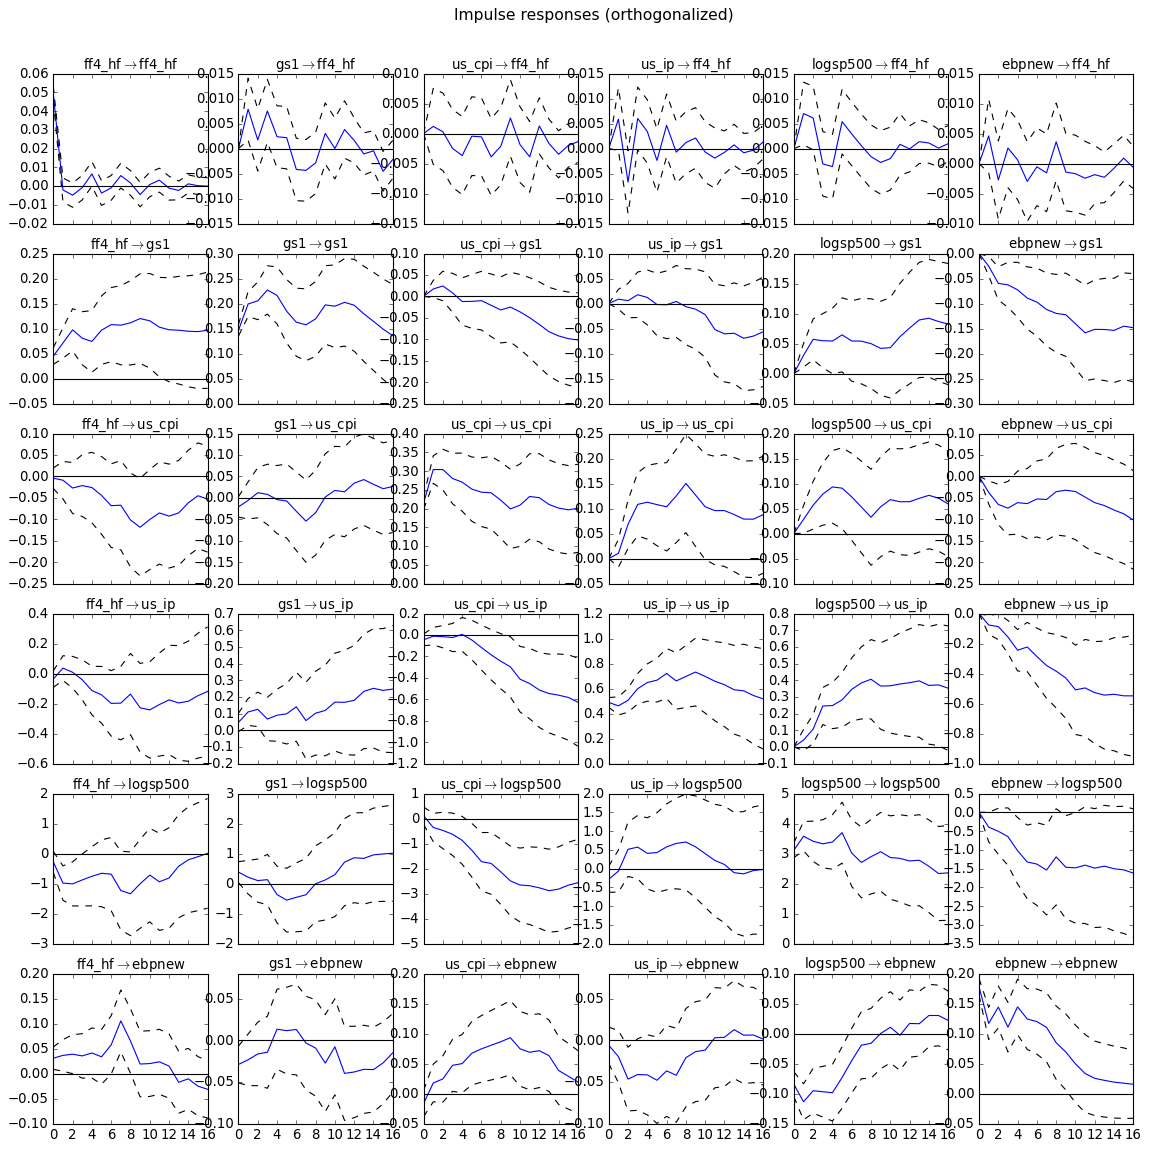

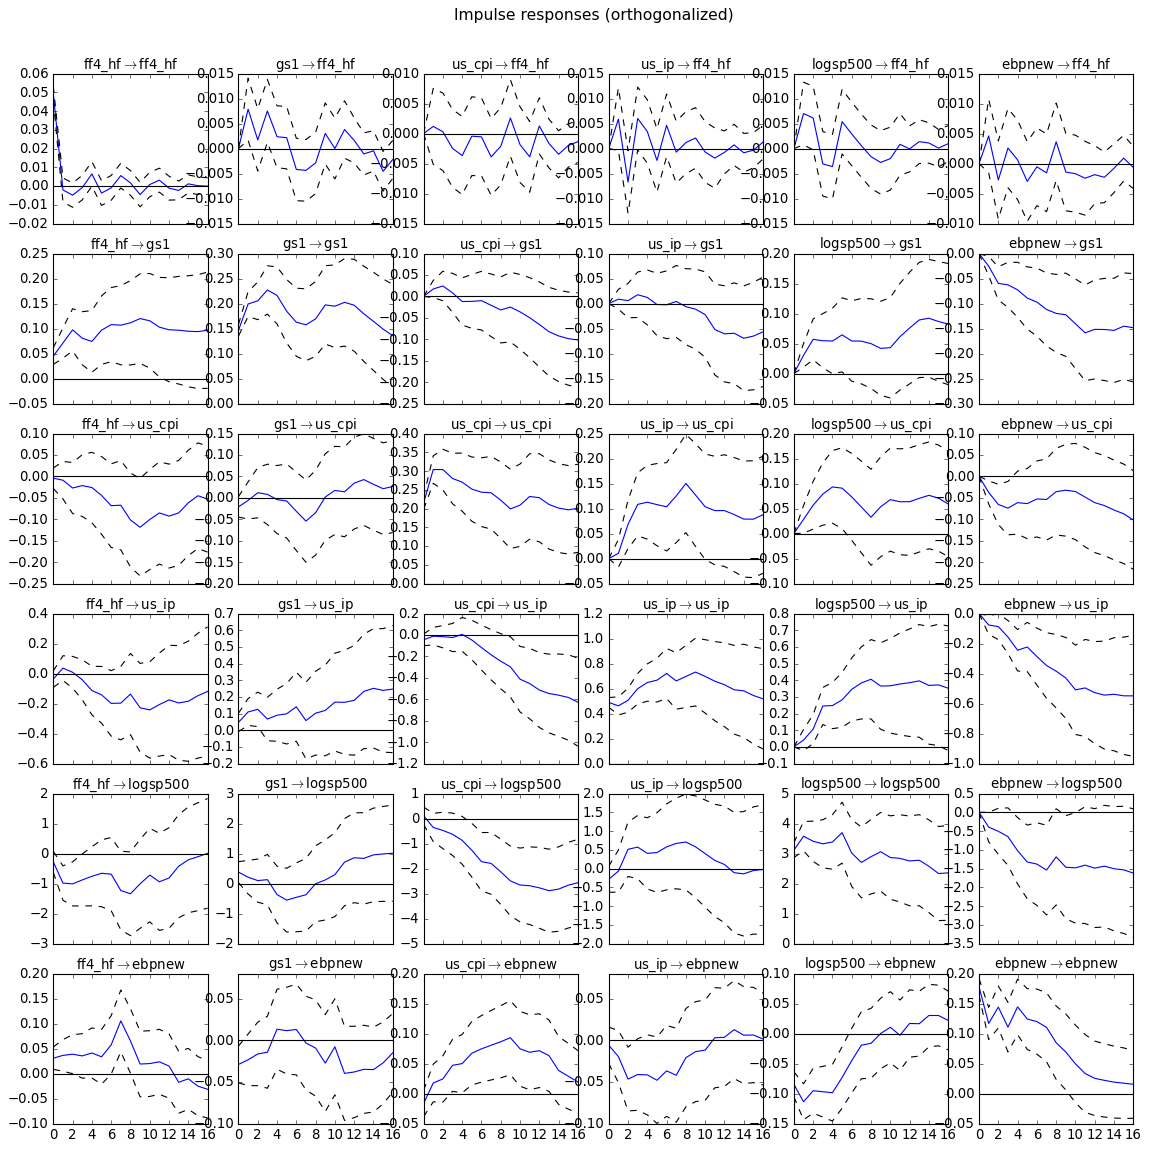

In [165]:
irf = VAR12_fitted.irf(16)
irf.plot(orth=True, figsize=(15,15))

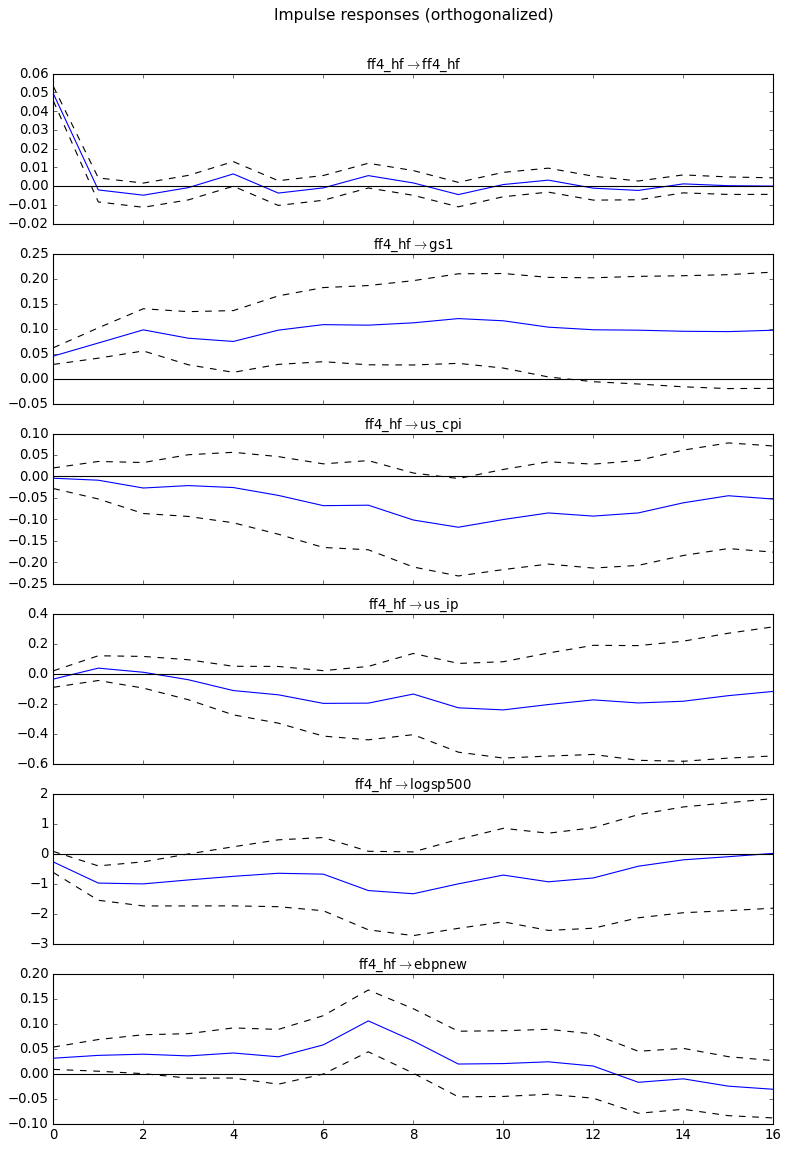

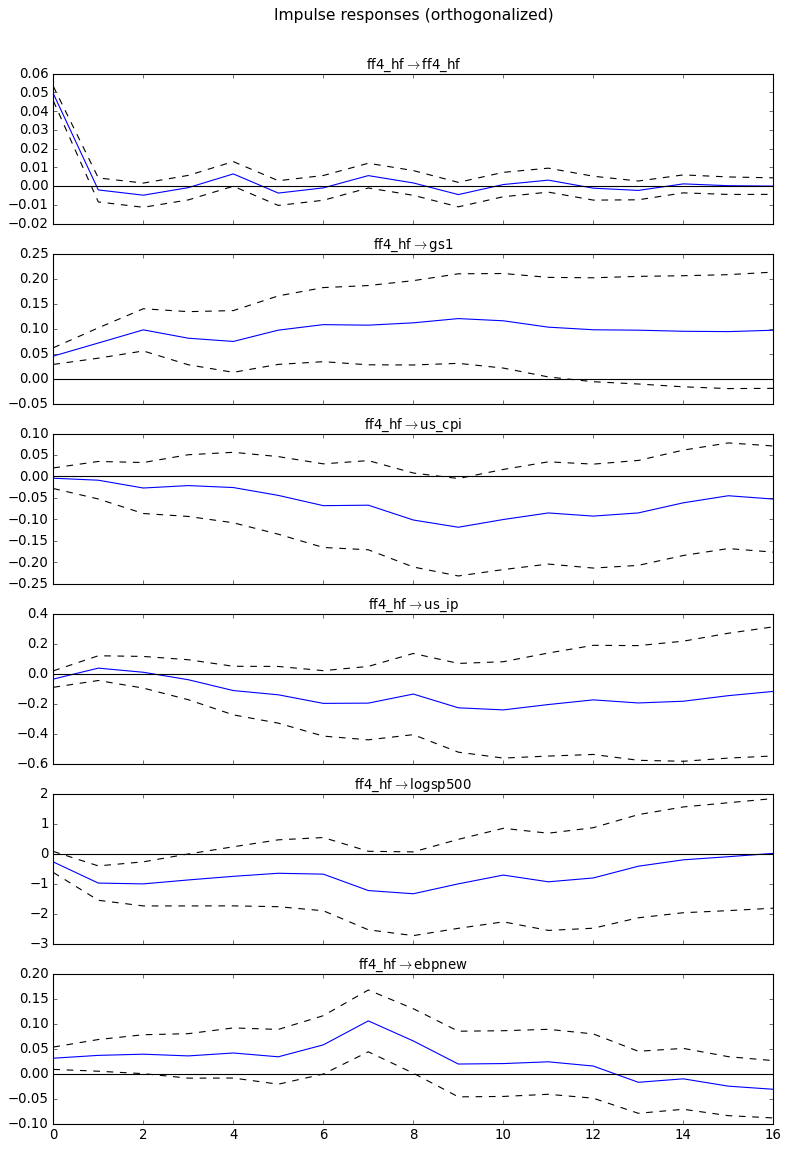

In [149]:
irf = VAR12_fitted.irf(16)
irf.plot(impulse=0, orth=True, figsize=(10,15))


**Interpretation:**
    The shocks presented above are in line with expectations. A monetary policy sock (increase in fed rate) leads to a positive response in one year-treasury yields, a persistent negative response in inflation a very short-lived positive response in industrial production that then turns negative, a presistently negative response in S&P500 that only recovers in the long run and a positive response in excess bond premium in short- and medium-run, which turns negative in the longer-run. 

### Question 3 (Part 4)

(-0.5, 663.5, 663.5, -0.5)

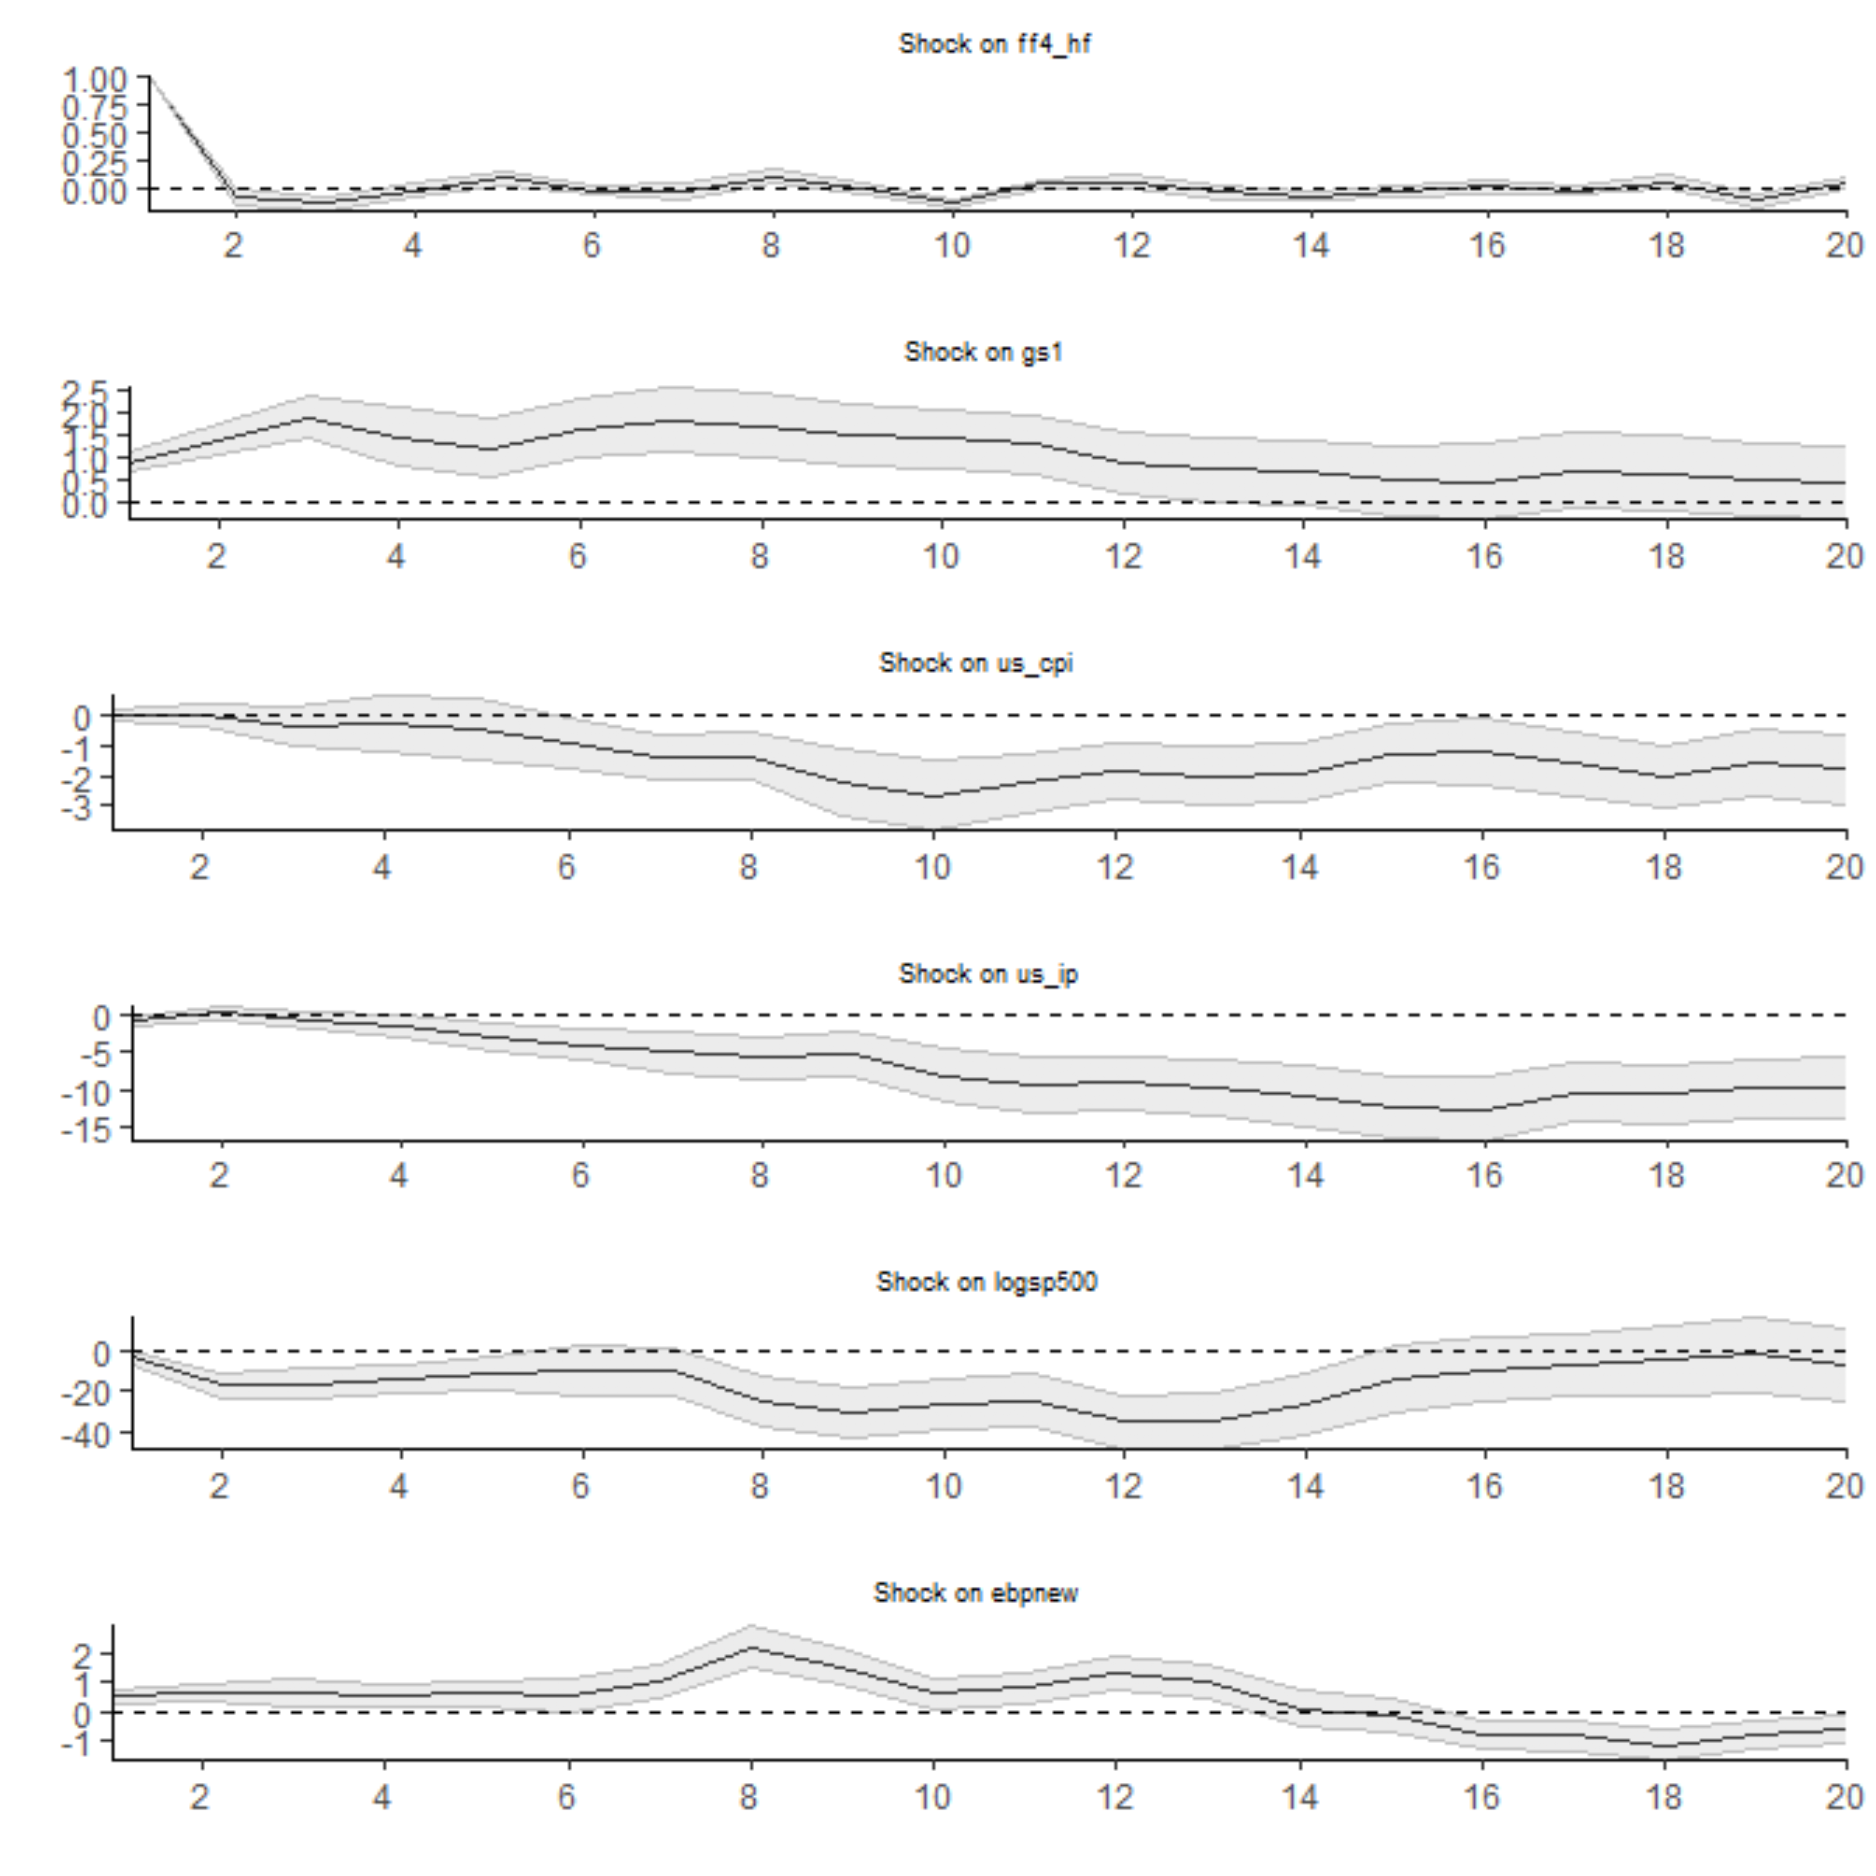

In [155]:
image1 = plt.imread("LPIV.png")
fig, axs = plt.subplots(1, figsize=(30, 30), sharex=False, sharey=False)

# Display the first image in the left plot
axs.imshow(image1)
axs.axis('off')


The overall pattern of impulse responses is largely in line with the SVAR model, with some minor deviations.

In [161]:
image2 = plt.imread("LPIV2.png")

(-0.5, 663.5, 663.5, -0.5)

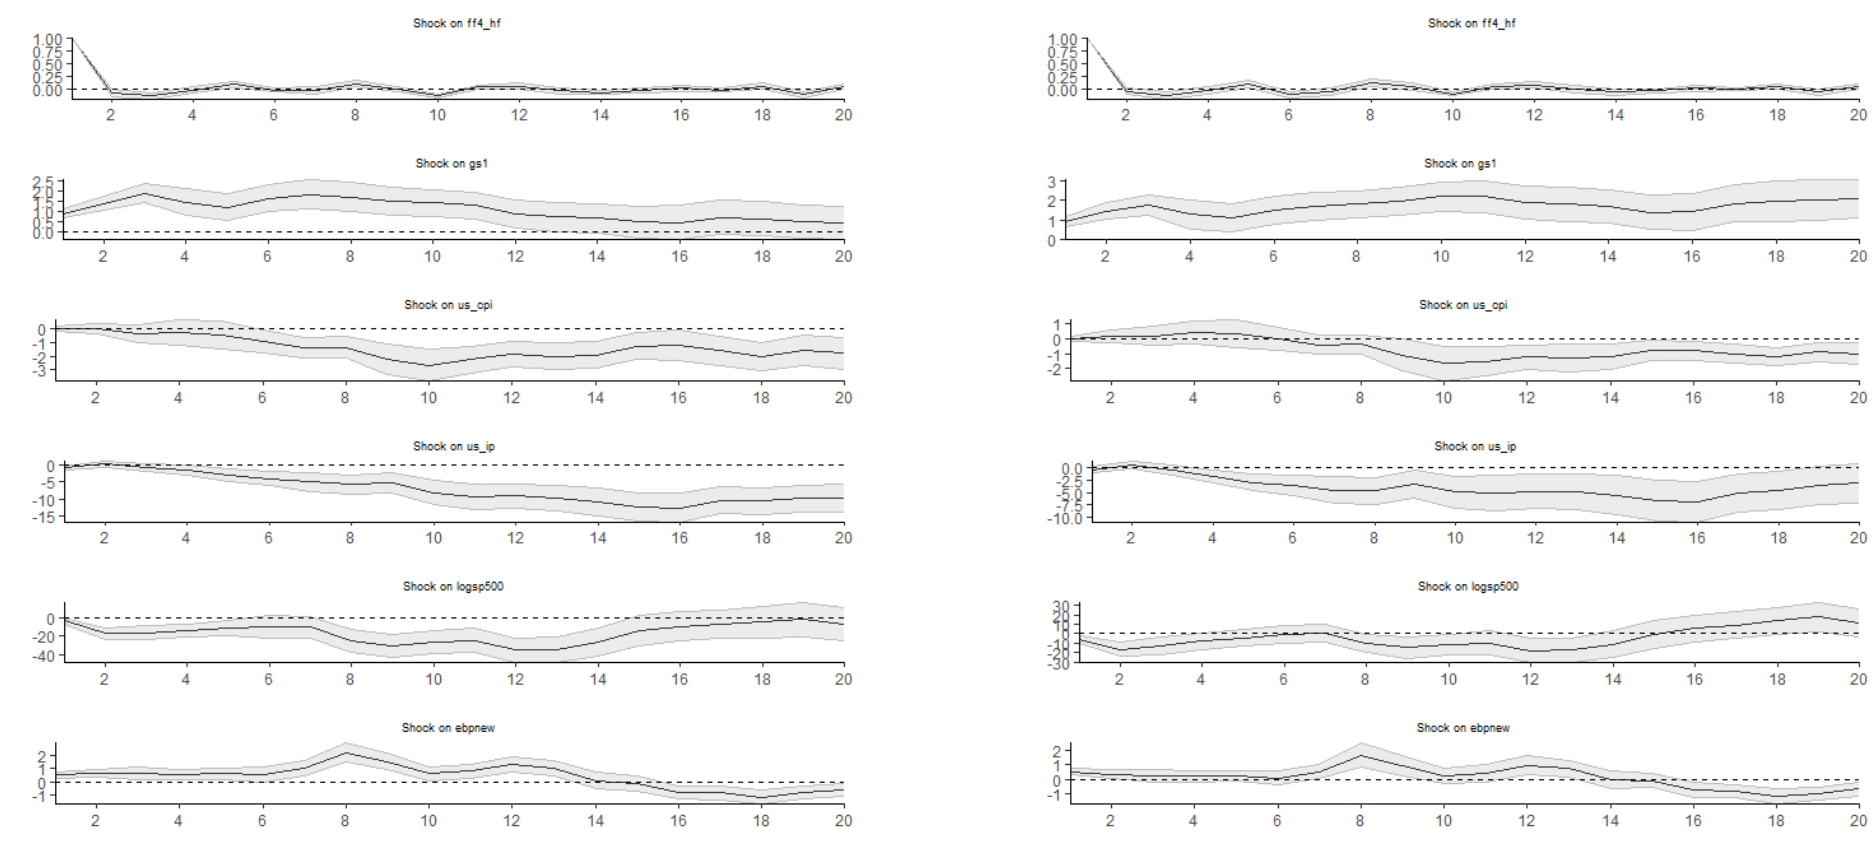

In [162]:
fig, axs = plt.subplots(1, 2, figsize=(30, 30), sharex=False, sharey=False)

# Display the first image in the left plot
axs[0].imshow(image1)
axs[0].axis('off')

# Display the second image in the right plot
axs[1].imshow(image2)
axs[1].axis('off')


Now that we have limited the number of lags from 12 to 6, we can see marked divergence in some of the IRFs from the original SVAR and the 12-lag LPIV model. However, the divergenece is no equally strong for all impulse responses case for all impulse responses. The most noticable case is for the shock on gs1 - one-year tresurt yields in the medium and long run (though the short-run effect is quite similar to what it was before). We also see a now mildly positive effect on the CPI as compared to the almost immediate negative effect earlier. The shock in industrial production does start to converge towards zero more obviously in the long-run now, whereas it did so to a much lesser degree in the two earlier models. Also, the shock on S&P500 behaves very diffierently in the long-run, with a much stronger positive trend.